Tejas Bharskar 11
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<class 'list'>
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - binary_accuracy: 0.6190 - loss: 0.6322 - val_binary_accuracy: 0.8610 - val_loss: 0.4622
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - binary_accuracy: 0.8817 - loss: 0.4006 - val_binary_accuracy: 0.8822 - val_loss: 0.3465
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - binary_accuracy: 0.9190 - loss: 0.2836 - val_binary_accuracy: 0.8860 - val_loss: 0.3038
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - binary_accuracy: 0.9286 - loss: 0.2234 - val_binary_accuracy: 0.8858 - val_loss: 0.2886
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - binary_accuracy: 0.9455 - loss: 0.1807 - val_binary_accuracy: 0.8859 - val_loss: 0.2860
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - binary_accuracy: 0.9552 - loss: 0.1498 - val_binary_accuracy: 0.8746 - val_loss: 0.3186
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - binary_accuracy: 0.9602 - loss: 0.1317 - val_binary_accuracy: 0.8811 - val_loss: 0.3103
Epoch 8/20
30

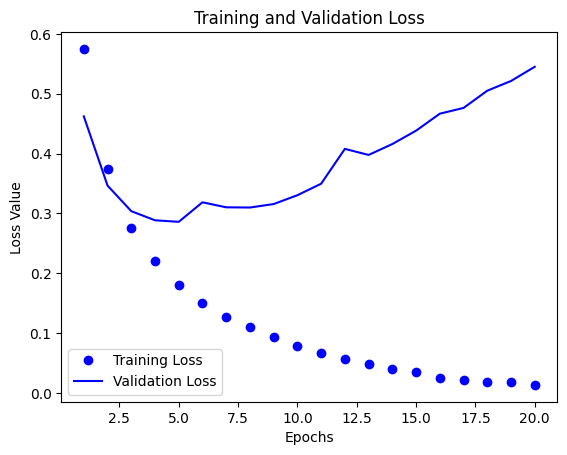

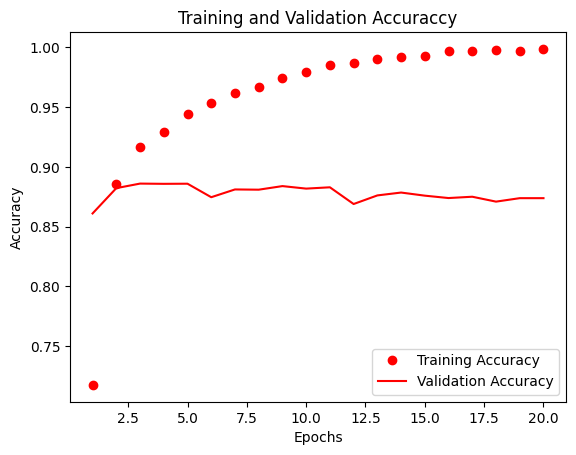

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - binary_accuracy: 0.9997 - loss: 0.0080 - val_binary_accuracy: 0.8625 - val_loss: 0.6226
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - binary_accuracy: 0.9988 - loss: 0.0092 - val_binary_accuracy: 0.8623 - val_loss: 0.6470
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - binary_accuracy: 0.9994 - loss: 0.0092 - val_binary_accuracy: 0.8722 - val_loss: 0.6222
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.14176

In [ ]:
from keras.datasets import imdb
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# Here is a list of maximum indexes in every review
print(type([max(sequence) for sequence in train_data]))
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding",
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review
import numpy as np
# Function to vectorize sequences
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension)) # Creates an all-zero matri
 for i, sequence in enumerate(sequences):
     results[i, sequence] = 1 # Sets specific indices of results to 1
 return results
# Vectorize training and test data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train[0]
X_train.shape
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(
 optimizer=optimizers.RMSprop(learning_rate=0.001),
 loss=losses.binary_crossentropy,
 metrics=[metrics.binary_accuracy]
)
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(
 partial_X_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(X_val, y_val)
)
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
%matplotlib inline
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()
# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
model.fit(
    partial_X_train, partial_y_train, epochs=3, batch_size=512, validation_data=(X_val, y_val)
)
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)
result
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
 y_pred[i] = 1 if score > 0.5 else 0
 from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
# error
mae